# 직접 해보세요!
## melt 메서드 사용하기(151쪽)
 > long data 를 wide data로 변환

- id_vars : 위치를 그대로 유지할 열의 이름을 지정 (고정시킬 녀석)
- value_vars : 행으로 위치를 변경할 열의 이름을 지정 
- val_name : value_vars로 위치를 변경할 열의 이름을 지정 
- value_name : var_name으로 위치를 변경할 열의 데이터를 지정한 열의 이름으로 지정 

### 1. 1개의 열만 고정하고 나머지 열을 행으로 바꾸기

In [341]:
import pandas as pd
pew = pd.read_csv('../data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [342]:
print(pew.iloc[:, 0:6])

                   religion  <$10k  $10-20k  $20-30k  $30-40k  $40-50k
0                  Agnostic     27       34       60       81       76
1                   Atheist     12       27       37       52       35
2                  Buddhist     27       21       30       34       33
3                  Catholic    418      617      732      670      638
4        Don’t know/refused     15       14       15       11       10
5          Evangelical Prot    575      869     1064      982      881
6                     Hindu      1        9        7        9       11
7   Historically Black Prot    228      244      236      238      197
8         Jehovah's Witness     20       27       24       24       21
9                    Jewish     19       19       25       25       30
10            Mainline Prot    289      495      619      655      651
11                   Mormon     29       40       48       51       56
12                   Muslim      6        7        9       10        9
13    

In [343]:
pew.columns

Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
       '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
      dtype='object')

In [344]:
pew_changed=pd.melt(pew, id_vars='religion', value_vars=pew.columns[1:10], var_name='income', value_name='count') 
pew_changed

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
157,Orthodox,>150k,46
158,Other Christian,>150k,12
159,Other Faiths,>150k,41
160,Other World Religions,>150k,4


In [350]:
np.unique(pew_changed['religion'])

array(['Agnostic', 'Atheist', 'Buddhist', 'Catholic',
       'Don’t know/refused', 'Evangelical Prot', 'Hindu',
       'Historically Black Prot', "Jehovah's Witness", 'Jewish',
       'Mainline Prot', 'Mormon', 'Muslim', 'Orthodox', 'Other Christian',
       'Other Faiths', 'Other World Religions', 'Unaffiliated'],
      dtype=object)

In [351]:
pew_origin = pew_changed.pivot_table(
    index='religion', 
    columns='income', 
    values='count'
)

pew_origin.head()

income,$10-20k,$100-150k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,<$10k,>150k
religion,,,,,,,,,
Agnostic,34,109,60,81,76,137,122,27,84
Atheist,27,59,37,52,35,70,73,12,74
Buddhist,21,39,30,34,33,58,62,27,53
Catholic,617,792,732,670,638,1116,949,418,633
Don’t know/refused,14,17,15,11,10,35,21,15,18


In [320]:
pew_long = pd.melt(pew, id_vars='religion') #religion 열은 놔두고 나머지 행으로 변경
print(pew_long.head())
print(pew_long.tail())

             religion variable  value
0            Agnostic    <$10k     27
1             Atheist    <$10k     12
2            Buddhist    <$10k     27
3            Catholic    <$10k    418
4  Don’t know/refused    <$10k     15
                  religion            variable  value
175               Orthodox  Don't know/refused     73
176        Other Christian  Don't know/refused     18
177           Other Faiths  Don't know/refused     71
178  Other World Religions  Don't know/refused      8
179           Unaffiliated  Don't know/refused    597


In [321]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count') 
#새로 행으로 들어간 데이터들(컬럼)의 열 이름 income
#새로 행으로 들어간 데이터의 (값)의 열 이름 count
pew_long.head()
# print(pew_long.tail())

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


### long 데이터를 이용하여 종교별 평균 수익률을 구하라


In [322]:
(100+150)/2

125.0

In [323]:
pew2 = pew.copy()
pew2

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [330]:
pew2.columns = ['religion', 10, 15, 25, 35, 45,62.5, 87.5, 125, 150, 'Don\'t know/refused']
pew2.head()

,religion,10,15,25,35,45,62.5,87.5,125,150,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [326]:
pew3=pd.melt(pew2, id_vars='religion', value_vars=pew2.columns[1:10], var_name='income', value_name='count') 

# pew3['i_c'] = pew3['income'].astype('int')*pew3['count'].astype('int')



In [328]:
pew3

,religion,income,count
0,Agnostic,10,27
1,Atheist,10,12
2,Buddhist,10,27
3,Catholic,10,418
4,Don’t know/refused,10,15
...,...,...,...
157,Orthodox,150,46
158,Other Christian,150,12
159,Other Faiths,150,41
160,Other World Religions,150,4


In [107]:
np.unique(pew3['income'])

array([ 10. ,  15. ,  25. ,  35. ,  45. ,  62.5,  87.5, 125. , 150. ])

In [110]:
# pew3['income'].astype('float')
pew3['income']=pd.to_numeric(pew3['income'])
# pew3['count'].astype('int')
pew3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 4 columns):
religion    162 non-null object
income      162 non-null float64
count       162 non-null int64
total       162 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


In [112]:
pew3

,religion,income,count,total
0,Agnostic,10.0,27,270.0
1,Atheist,10.0,12,120.0
2,Buddhist,10.0,27,270.0
3,Catholic,10.0,418,4180.0
4,Don’t know/refused,10.0,15,150.0
...,...,...,...,...
157,Orthodox,150.0,46,6900.0
158,Other Christian,150.0,12,1800.0
159,Other Faiths,150.0,41,6150.0
160,Other World Religions,150.0,4,600.0


In [96]:
pew3['total']=pew3['income']*pew3['count']
pew3['total']

0        270.0
1        120.0
2        270.0
3       4180.0
4        150.0
        ...   
157     6900.0
158     1800.0
159     6150.0
160      600.0
161    38700.0
Name: total, Length: 162, dtype: float64

In [129]:
pew4=pew3.groupby('religion').agg({'income':'mean','count':'sum', 'total':'sum'})
pew4['result'] = pew4['total'] /pew4['count']

In [130]:
pew4['result'] = pew4['total'] /pew4['count']
pew4.sort_values('result',ascending=False)

,income,count,total,result
religion,,,,
Hindu,61.666667,220,21467.5,97.579545
Jewish,61.666667,520,48825.0,93.894231
Atheist,61.666667,439,34082.5,77.636674
Orthodox,61.666667,290,21932.5,75.629310
Agnostic,61.666667,730,53997.5,73.969178
Buddhist,61.666667,357,25885.0,72.507003
Mainline Prot,61.666667,6142,418585.0,68.151254
Other Christian,61.666667,111,7510.0,67.657658
Don’t know/refused,61.666667,156,10420.0,66.794872


### 5. 2개 이상의 열을 고정하고 나머지 열을 행으로 바꾸기

In [44]:
billboard = pd.read_csv('../data/billboard.csv')

print(billboard.iloc[0:5, 0:16])

   year        artist                    track  time date.entered  wk1   wk2  \
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26   87  82.0   
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02   91  87.0   
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08   81  70.0   
3  2000  3 Doors Down                    Loser  4:24   2000-10-21   76  76.0   
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15   57  34.0   

    wk3   wk4   wk5   wk6   wk7   wk8   wk9  wk10  wk11  
0  72.0  77.0  87.0  94.0  99.0   NaN   NaN   NaN   NaN  
1  92.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  68.0  67.0  66.0  57.0  54.0  53.0  51.0  51.0  51.0  
3  72.0  69.0  67.0  65.0  55.0  59.0  62.0  61.0  61.0  
4  25.0  17.0  17.0  31.0  36.0  49.0  53.0  57.0  64.0  


In [2]:
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

print(billboard_long.head())

   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


### 빌보드 데이터를 연도, 아티스트, 트랙별로 유니크한 데이터를 구성한다
1. 이 유니크한 데이터별로, billboard에서 평균 rate를 계산
2. 이 유니크한 데이터 별로 billboard_long 에서 평균 rate를 계산

In [45]:
#billboard에 열 추가하면서 보여주고 싶을때
w_data=billboard.iloc[:,5:]
billboard['avg_rating']=w_data.sum(1)/w_data.count(1)
billboard['avg_rating2']=w_data.mean(1,skipna=True)
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76,avg_rating,avg_rating2
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.428571,85.428571
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,90.000000
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.471698,26.471698
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.100000,67.100000
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.222222,56.222222


In [139]:
# 단독 Series와 DataFrame 으로 보여주고 싶을때
temp=w_data.sum(1)/w_data.count(1)
temp=pd.DataFrame(temp, columns=['avg_rating'])

pd.concat([temp,temp.mean(0)],axis=1)

,avg_rating,0
0,85.428571,NaN
1,90.000000,NaN
2,26.471698,NaN
3,67.100000,NaN
4,56.222222,NaN
...,...,...
313,84.166667,NaN
314,88.857143,NaN
315,99.000000,NaN
316,18.641026,NaN


In [25]:
billboard.head()

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76,avg_rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.428571
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.000000
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.471698
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.100000
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.222222


In [4]:
# melt 하고 groupby  할 때 
billboard_long.groupby(['year','artist','track']).mean()

rating
year artist           track                             
2000 2 Pac            Baby Don't Cry (Keep...  85.428571
     2Ge+her          The Hardest Part Of ...  90.000000
     3 Doors Down     Kryptonite               26.471698
                      Loser                    67.100000
     504 Boyz         Wobble Wobble            56.222222
...                                                  ...
     Yankee Grey      Another Nine Minutes     83.125000
     Yearwood, Trisha Real Live Woman          84.166667
     Ying Yang Twins  Whistle While You Tw...  88.857143
     Zombie Nation    Kernkraft 400            99.000000
     matchbox twenty  Bent                     18.641026

[317 rows x 1 columns]

# 직접 해보세요!
## ebola 데이터 집합 살펴보기(155쪽)

In [47]:
ebola = pd.read_csv('../data/country_timeseries.csv')
print(ebola.columns)

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')


In [48]:
print(ebola.iloc[:5, [0, 1, 2, 3, 10, 11]])

         Date  Day  Cases_Guinea  Cases_Liberia  Deaths_Guinea  Deaths_Liberia
0    1/5/2015  289        2776.0            NaN         1786.0             NaN
1    1/4/2015  288        2775.0            NaN         1781.0             NaN
2    1/3/2015  287        2769.0         8166.0         1767.0          3496.0
3    1/2/2015  286           NaN         8157.0            NaN          3496.0
4  12/31/2014  284        2730.0         8115.0         1739.0          3471.0


In [49]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
print(ebola_long.head())

         Date  Day      variable   value
0    1/5/2015  289  Cases_Guinea  2776.0
1    1/4/2015  288  Cases_Guinea  2775.0
2    1/3/2015  287  Cases_Guinea  2769.0
3    1/2/2015  286  Cases_Guinea     NaN
4  12/31/2014  284  Cases_Guinea  2730.0


# 직접 해보세요!
## 열 이름 분리하고 데이터프레임에 추가하기(156쪽)

In [10]:
variable_split = ebola_long.variable.str.split('_')

print(variable_split[:5])

0    [Cases, Guinea]
1    [Cases, Guinea]
2    [Cases, Guinea]
3    [Cases, Guinea]
4    [Cases, Guinea]
Name: variable, dtype: object


In [11]:
print(type(variable_split))

<class 'pandas.core.series.Series'>


In [12]:
print(type(variable_split[0]))

<class 'list'>


In [13]:
status_values = variable_split.str.get(0) 
country_values = variable_split.str.get(1)

print(status_values[:5])

0    Cases
1    Cases
2    Cases
3    Cases
4    Cases
Name: variable, dtype: object


In [14]:
print(status_values[-5:])

1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, dtype: object


In [15]:
print(country_values[:5])

0    Guinea
1    Guinea
2    Guinea
3    Guinea
4    Guinea
Name: variable, dtype: object


In [16]:
print(country_values[-5:])

1947    Mali
1948    Mali
1949    Mali
1950    Mali
1951    Mali
Name: variable, dtype: object


In [17]:
ebola_long['status'] = status_values 
ebola_long['country'] = country_values
print(ebola_long.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


# 알아두면 좋아요!
## concat 메서드를 응용하여 데이터프레임에 열 추가하기(159쪽)

In [56]:
 ebola_long.variable.str.split('_', expand=True)

,0,1
0,Cases,Guinea
1,Cases,Guinea
2,Cases,Guinea
3,Cases,Guinea
4,Cases,Guinea
...,...,...
1947,Deaths,Mali
1948,Deaths,Mali
1949,Deaths,Mali
1950,Deaths,Mali


In [59]:
variable_split = ebola_long.variable.str.split('_', expand=True) ## expand = True // series가 아닌 DataFrame으로 만듦
variable_split.columns = ['status', 'country'] 
ebola_parsed = pd.concat([ebola_long, variable_split], axis=1)

print(ebola_parsed.head())

         Date  Day      variable   value status country
0    1/5/2015  289  Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  Cases  Guinea


### 연습 
- variable 변수 제거
- groupby (status, country)
- 오름차순 정렬 (날짜별)
- 결측치 제거(행방향) ==> temp1
- 결측치를 ffill로 대체한 temp2


In [99]:
temp = ebola_parsed.copy()
temp.drop(columns=['variable'], inplace=True)
temp

,Date,Day,value,status,country
0,1/5/2015,289,2776.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
3,1/2/2015,286,NaN,Cases,Guinea
4,12/31/2014,284,2730.0,Cases,Guinea
...,...,...,...,...,...
1947,3/27/2014,5,NaN,Deaths,Mali
1948,3/26/2014,4,NaN,Deaths,Mali
1949,3/25/2014,3,NaN,Deaths,Mali
1950,3/24/2014,2,NaN,Deaths,Mali


In [104]:
## for문을 이용해서 groupby 후 sort 하기
temp4 = []
for _,group in temp.groupby(['status','country']):
    temp4.append(group.sort_values('Date', ascending=True).fillna(method='pad'))
pd.concat(temp4).tail()

,Date,Day,value,status,country
1633,9/23/2014,185,1.0,Deaths,UnitedStates
1632,9/28/2014,190,1.0,Deaths,UnitedStates
1643,9/5/2014,167,1.0,Deaths,UnitedStates
1642,9/7/2014,169,1.0,Deaths,UnitedStates
1641,9/9/2014,171,1.0,Deaths,UnitedStates


In [98]:
## apply를 이용해서 groupby 후 sort 하기

sort_df = lambda x: x.sort_values('Date', ascending=True).fillna(method='pad', axis=0)  #forward fill
temp.groupby(['status','country']).apply(sort_df)  ## groupby에는 sort 함수가 없기 때문에 apply로 groupy후의 함수를 적용

Date  Day   value  status       country
status country                                                        
Cases  Guinea       3      1/2/2015  286     NaN   Cases        Guinea
                    2      1/3/2015  287  2769.0   Cases        Guinea
                    1      1/4/2015  288  2775.0   Cases        Guinea
                    0      1/5/2015  289  2776.0   Cases        Guinea
                    45    10/1/2014  193  1199.0   Cases        Guinea
...                             ...  ...     ...     ...           ...
Deaths UnitedStates 1633  9/23/2014  185     1.0  Deaths  UnitedStates
                    1632  9/28/2014  190     1.0  Deaths  UnitedStates
                    1643   9/5/2014  167     1.0  Deaths  UnitedStates
                    1642   9/7/2014  169     1.0  Deaths  UnitedStates
                    1641   9/9/2014  171     1.0  Deaths  UnitedStates

[1952 rows x 5 columns]

In [100]:
sort_df = lambda x: x.sort_values('Date', ascending=True).dropna(axis=0)
temp.groupby(['status','country']).apply(sort_df)  ## groupby에는 sort 함수가 없기 때문에 apply로 groupy후의 함수를 적용

Date  Day   value  status       country
status country                                                         
Cases  Guinea       2       1/3/2015  287  2769.0   Cases        Guinea
                    1       1/4/2015  288  2775.0   Cases        Guinea
                    0       1/5/2015  289  2776.0   Cases        Guinea
                    45     10/1/2014  193  1199.0   Cases        Guinea
                    39    10/12/2014  204  1472.0   Cases        Guinea
...                              ...  ...     ...     ...           ...
Deaths UnitedStates 1603  11/23/2014  246     1.0  Deaths  UnitedStates
                    1601  11/30/2014  253     1.0  Deaths  UnitedStates
                    1612   11/4/2014  227     1.0  Deaths  UnitedStates
                    1610   11/9/2014  232     1.0  Deaths  UnitedStates
                    1599   12/7/2014  260     1.0  Deaths  UnitedStates

[738 rows x 5 columns]

In [89]:
temp.sort_values(['status','country','Date'],ascending=True)

,Date,Day,value,status,country
3,1/2/2015,286,NaN,Cases,Guinea
2,1/3/2015,287,2769.0,Cases,Guinea
1,1/4/2015,288,2775.0,Cases,Guinea
0,1/5/2015,289,2776.0,Cases,Guinea
45,10/1/2014,193,1199.0,Cases,Guinea
...,...,...,...,...,...
1633,9/23/2014,185,NaN,Deaths,UnitedStates
1632,9/28/2014,190,NaN,Deaths,UnitedStates
1643,9/5/2014,167,NaN,Deaths,UnitedStates
1642,9/7/2014,169,NaN,Deaths,UnitedStates


In [102]:
temp1=temp.dropna(axis=0)
temp1.tail()
temp1.shape

(738, 5)

In [91]:
temp.fillna(method='ffill').tail()

,Date,Day,value,status,country
1947,3/27/2014,5,1.0,Deaths,Mali
1948,3/26/2014,4,1.0,Deaths,Mali
1949,3/25/2014,3,1.0,Deaths,Mali
1950,3/24/2014,2,1.0,Deaths,Mali
1951,3/22/2014,0,1.0,Deaths,Mali


# 직접 해보세요!
## 기상 데이터의 여러 열을 하나로 정리하기 ─ melt, pivot_table 메서드(160쪽)

In [337]:
weather = pd.read_csv('../data/weather.csv') 
print(weather.iloc[:5, :11])

        id  year  month element  d1    d2    d3  d4    d5  d6  d7
0  MX17004  2010      1    tmax NaN   NaN   NaN NaN   NaN NaN NaN
1  MX17004  2010      1    tmin NaN   NaN   NaN NaN   NaN NaN NaN
2  MX17004  2010      2    tmax NaN  27.3  24.1 NaN   NaN NaN NaN
3  MX17004  2010      2    tmin NaN  14.4  14.4 NaN   NaN NaN NaN
4  MX17004  2010      3    tmax NaN   NaN   NaN NaN  32.1 NaN NaN


In [107]:
weather_melt = pd.melt(weather, id_vars=['id', 'year', 'month', 'element'], var_name='day', value_name='temp') #d1~d7 =>day로
print(weather_melt.head())

        id  year  month element day  temp
0  MX17004  2010      1    tmax  d1   NaN
1  MX17004  2010      1    tmin  d1   NaN
2  MX17004  2010      2    tmax  d1   NaN
3  MX17004  2010      2    tmin  d1   NaN
4  MX17004  2010      3    tmax  d1   NaN


pivot_table : melt와 정 반대. 열1 => 열 이름 / 열2 => 열의 값 으로 변경

In [110]:
weather_tidy = weather_melt.pivot_table(
    index=['id', 'year', 'month', 'day'], 
    columns='element', 
    values='temp'
)

print(weather_tidy) 

element                 tmax  tmin
id      year month day            
MX17004 2010 1     d30  27.8  14.5
             2     d11  29.7  13.4
                   d2   27.3  14.4
                   d23  29.9  10.7
                   d3   24.1  14.4
             3     d10  34.5  16.8
                   d16  31.1  17.6
                   d5   32.1  14.2
             4     d27  36.3  16.7
             5     d27  33.2  18.2
             6     d17  28.0  17.5
                   d29  30.1  18.0
             7     d3   28.6  17.5
                   d14  29.9  16.5
             8     d23  26.4  15.0
                   d5   29.6  15.8
                   d29  28.0  15.3
                   d13  29.8  16.5
                   d25  29.7  15.6
                   d31  25.4  15.4
                   d8   29.0  17.3
             10    d5   27.0  14.0
                   d14  29.5  13.0
                   d15  28.7  10.5
                   d28  31.2  15.0
                   d7   28.1  12.9
             11    d

In [111]:
weather_tidy_flat = weather_tidy.reset_index() 
print(weather_tidy_flat.head())

element       id  year  month  day  tmax  tmin
0        MX17004  2010      1  d30  27.8  14.5
1        MX17004  2010      2  d11  29.7  13.4
2        MX17004  2010      2   d2  27.3  14.4
3        MX17004  2010      2  d23  29.9  10.7
4        MX17004  2010      2   d3  24.1  14.4


In [112]:
weather_tidy_flat.day = weather_tidy_flat.day.map(lambda x: int(x[1:]))
weather_tidy_flat.dtypes

element
id        object
year       int64
month      int64
day        int64
tmax     float64
tmin     float64
dtype: object

In [118]:
weather_tidy_flat.sort_values(['year','month','day']).reset_index(drop=True)
weather_tidy_flat['date'] = pd.to_datetime(weather_tidy_flat[['year','month','day']])
weather_tidy_flat.drop(['year','month','day'],axis=1, inplace=True)
weather_tidy_flat.head()

element,id,tmax,tmin,date
0,MX17004,27.8,14.5,2010-01-30
1,MX17004,29.7,13.4,2010-02-11
2,MX17004,27.3,14.4,2010-02-02
3,MX17004,29.9,10.7,2010-02-23
4,MX17004,24.1,14.4,2010-02-03


# 직접 해보세요!
## 빌보드 차트의 중복 데이터 처리하기(163쪽)

In [123]:
billboard = pd.read_csv('../data/billboard.csv')
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name='week', value_name='rating')

print(billboard_long.shape)

print(billboard_long.head())

(24092, 7)
   year        artist                    track  time date.entered week  rating
0  2000         2 Pac  Baby Don't Cry (Keep...  4:22   2000-02-26  wk1    87.0
1  2000       2Ge+her  The Hardest Part Of ...  3:15   2000-09-02  wk1    91.0
2  2000  3 Doors Down               Kryptonite  3:53   2000-04-08  wk1    81.0
3  2000  3 Doors Down                    Loser  4:24   2000-10-21  wk1    76.0
4  2000      504 Boyz            Wobble Wobble  3:35   2000-04-15  wk1    57.0


In [124]:
print(billboard_long[billboard_long.track == 'Loser'].head())

      year        artist  track  time date.entered week  rating
3     2000  3 Doors Down  Loser  4:24   2000-10-21  wk1    76.0
320   2000  3 Doors Down  Loser  4:24   2000-10-21  wk2    76.0
637   2000  3 Doors Down  Loser  4:24   2000-10-21  wk3    72.0
954   2000  3 Doors Down  Loser  4:24   2000-10-21  wk4    69.0
1271  2000  3 Doors Down  Loser  4:24   2000-10-21  wk5    67.0


In [125]:
billboard_songs = billboard_long[['year', 'artist', 'track', 'time']]  #이게 같으먄 아래의 drop_Duplicate에서 삭제되도록
print(billboard_songs.shape)

(24092, 4)


In [126]:
billboard_songs = billboard_songs.drop_duplicates() 
print(billboard_songs.shape)

(317, 4)


In [127]:
billboard_songs['id'] = range(len(billboard_songs)) 
print(billboard_songs.head(n=10))

   year          artist                    track  time  id
0  2000           2 Pac  Baby Don't Cry (Keep...  4:22   0
1  2000         2Ge+her  The Hardest Part Of ...  3:15   1
2  2000    3 Doors Down               Kryptonite  3:53   2
3  2000    3 Doors Down                    Loser  4:24   3
4  2000        504 Boyz            Wobble Wobble  3:35   4
5  2000            98^0  Give Me Just One Nig...  3:24   5
6  2000         A*Teens            Dancing Queen  3:44   6
7  2000         Aaliyah            I Don't Wanna  4:15   7
8  2000         Aaliyah                Try Again  4:03   8
9  2000  Adams, Yolanda            Open My Heart  5:30   9


중복데이터를 갖는 'year', 'artist', 'track', 'time' d의 열을 모아 중복을 제거아하고 id를 모집
이제 merge를 통해 

In [129]:
billboard_ratings = billboard_long.merge( billboard_songs, on=['year', 'artist', 'track']) 
print(billboard_ratings.shape)

(24092, 9)


In [130]:
print(billboard_ratings.head())

   year artist                    track time_x date.entered week  rating  \
0  2000  2 Pac  Baby Don't Cry (Keep...   4:22   2000-02-26  wk1    87.0   
1  2000  2 Pac  Baby Don't Cry (Keep...   4:22   2000-02-26  wk2    82.0   
2  2000  2 Pac  Baby Don't Cry (Keep...   4:22   2000-02-26  wk3    72.0   
3  2000  2 Pac  Baby Don't Cry (Keep...   4:22   2000-02-26  wk4    77.0   
4  2000  2 Pac  Baby Don't Cry (Keep...   4:22   2000-02-26  wk5    87.0   

  time_y  id  
0   4:22   0  
1   4:22   0  
2   4:22   0  
3   4:22   0  
4   4:22   0  


In [131]:
## 중복제거를 통한 메모리 공간 절약 방법은?
billboard_ratings= billboard_ratings.iloc[:,5:]
billboard_ratings

,week,rating,time_y,id
0,wk1,87.0,4:22,0
1,wk2,82.0,4:22,0
2,wk3,72.0,4:22,0
3,wk4,77.0,4:22,0
4,wk5,87.0,4:22,0
...,...,...,...,...
24087,wk72,NaN,4:12,316
24088,wk73,NaN,4:12,316
24089,wk74,NaN,4:12,316
24090,wk75,NaN,4:12,316


In [132]:
billboard_songs.merge(billboard_ratings,on='id')

,year,artist,track,time,id,week,rating,time_y
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0,wk1,87.0,4:22
1,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0,wk2,82.0,4:22
2,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0,wk3,72.0,4:22
3,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0,wk4,77.0,4:22
4,2000,2 Pac,Baby Don't Cry (Keep...,4:22,0,wk5,87.0,4:22
...,...,...,...,...,...,...,...,...
24087,2000,matchbox twenty,Bent,4:12,316,wk72,NaN,4:12
24088,2000,matchbox twenty,Bent,4:12,316,wk73,NaN,4:12
24089,2000,matchbox twenty,Bent,4:12,316,wk74,NaN,4:12
24090,2000,matchbox twenty,Bent,4:12,316,wk75,NaN,4:12


# 직접 해보세요!
## 뉴욕 택시 데이터 준비(166쪽)

In [119]:
import os 
import urllib.request

# 네트워크 상태에 따라 5 ~ 15분이 소요됩니다.
with open('../data/raw_data_urls.txt', 'r') as data_urls:
    for line, url in enumerate(data_urls):
        if line == 5:
            break 
        fn = url.split('/')[-1].strip()
        fp = os.path.join('', '../data', fn)
        print(url)
        print(fp)
        urllib.request.urlretrieve(url, fp)

https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-01.csv

../data\fhv_tripdata_2015-01.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-02.csv

../data\fhv_tripdata_2015-02.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-03.csv

../data\fhv_tripdata_2015-03.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-04.csv

../data\fhv_tripdata_2015-04.csv
https://s3.amazonaws.com/nyc-tlc/trip+data/fhv_tripdata_2015-05.csv

../data\fhv_tripdata_2015-05.csv


In [133]:
import glob  #특정 디렉토리에 있는 파일명을 리스트에 담아주는 역할
nyc_taxi_data = glob.glob('../data/fhv_*') 
print(nyc_taxi_data)

['../data\\fhv_tripdata_2015-01.csv', '../data\\fhv_tripdata_2015-02.csv', '../data\\fhv_tripdata_2015-03.csv', '../data\\fhv_tripdata_2015-04.csv', '../data\\fhv_tripdata_2015-05.csv']


In [134]:
taxi1 = pd.read_csv(nyc_taxi_data[0]) 
taxi2 = pd.read_csv(nyc_taxi_data[1]) 
taxi3 = pd.read_csv(nyc_taxi_data[2]) 
taxi4 = pd.read_csv(nyc_taxi_data[3]) 
taxi5 = pd.read_csv(nyc_taxi_data[4])

In [135]:
print(taxi1.head(n=2)) 
print(taxi2.head(n=2)) 
print(taxi3.head(n=2)) 
print(taxi4.head(n=2)) 
print(taxi5.head(n=2))

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [154]:
# 위의 셀들을 반복문으로 돌리고 싶을 때
# eval : 문자로된 파이썬 '식'을 인수로 받아 파이썬 컴파일 코드로 변환
# exec : 문자로된 파이썬 '문'을 인수로 받아 파이썬 컴파일 코드로 변환
for i in range(5):
    j = i+1
    dfCreation = 'taxi{} = pd.read_csv(nyc_taxi_data[{}]) '.format(j,i)
    dfPrint = 'print(taxi{}.head(n=2)) '.format(j)
    exec(dfCreation)   #string문을 실행
    exec(dfPrint)

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-02-01 00:00:00         NaN
1               B00013  2015-02-01 00:01:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00029  2015-03-01 00:02:00       213.0
1               B00029  2015-03-01 00:03:00        51.0
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-04-01 04:30:00         NaN
1               B00001  2015-04-01 06:00:00         NaN
  Dispatching_base_num          Pickup_date  locationID
0               B00001  2015-05-01 04:30:00         NaN
1               B00001  2015-05-01 05:00:00         NaN


In [163]:
print(taxi1.shape) 
print(taxi2.shape) 
print(taxi3.shape) 
print(taxi4.shape) 
print(taxi5.shape)

(2746033, 3)
(3126401, 3)
(3281427, 3)
(3917789, 3)
(4296067, 3)


In [164]:
taxi = pd.concat([taxi1, taxi2, taxi3, taxi4, taxi5])

print(taxi.shape)

(17367717, 3)


### 연습
대용량 데이터에서는 필요한 데이터만을 우선적으로 필터링하거나 selection하는 것이 좋다. 위 데이터에서
1. 심야할증이 적용되는 00:00:00부터 05:00:00 데이터만을 선택하고
2. locationID가 결측된 데이터를 우선 제외하여 결합하는 코드를 작성하라

In [171]:
taxi.Pickup_date=pd.to_datetime(taxi.Pickup_date)

In [216]:
taxi2 = taxi.copy()

In [217]:
taxi2['hour']=taxi.Pickup_date.dt.hour

taxi.head()


,Dispatching_base_num,Pickup_date,locationID
0,B00013,2015-01-01 00:30:00,NaN
1,B00013,2015-01-01 01:22:00,NaN
2,B00013,2015-01-01 01:23:00,NaN
3,B00013,2015-01-01 01:44:00,NaN
4,B00013,2015-01-01 02:00:00,NaN


In [221]:

condts = (taxi2['hour'] <5) & (taxi2.locationID.notna())
taxi2 = taxi2[condts]
taxi2

,Dispatching_base_num,Pickup_date,locationID,hour
20904,B00053,2015-01-01 01:05:00,45.0,1
20905,B00053,2015-01-01 01:30:00,141.0,1
20906,B00053,2015-01-01 02:00:00,191.0,2
20940,B00053,2015-01-03 00:10:00,90.0,0
20941,B00053,2015-01-03 01:21:00,132.0,1
...,...,...,...,...
4294959,B02808,2015-05-24 04:44:00,264.0,4
4295005,B02808,2015-05-27 04:12:00,264.0,4
4295006,B02808,2015-05-27 04:15:00,264.0,4
4295012,B02808,2015-05-28 00:16:00,264.0,0


### 연습
1) ebola 데이터에 대해 아래오 같은 표를 작성하세요

2) 이 데이터에 대해 나라별로 시간에 따른 cases와 deaths 그래프를 그려라
- 8개의 나라에 대해 plt.subplots(4,2)를 그린다

3) 나라별 deathRate의 평균을 막대그래프로 그려라

In [223]:
ebola = pd.read_csv('../data/country_timeseries.csv')
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [240]:
table = pd.pivot_table(ebola_parsed[ebola_parsed['status']=='Cases'], values=['value'], index=['Date','Day','country'])
table

value
Date     Day country            
1/2/2015 286 Liberia      8157.0
1/3/2015 287 Guinea       2769.0
             Liberia      8166.0
             SierraLeone  9722.0
1/4/2015 288 Guinea       2775.0
...                          ...
9/7/2014 169 Liberia      2081.0
             Nigeria        21.0
             Senegal         3.0
             SierraLeone  1424.0
9/9/2014 171 Liberia      2407.0

[372 rows x 1 columns]

In [241]:
table2 = pd.pivot_table(ebola_parsed[ebola_parsed['status']=='Deaths'], values=['value'], index=['Date','Day','country'])
table2.head()

value
Date     Day country            
1/2/2015 286 Liberia      3496.0
1/3/2015 287 Guinea       1767.0
             Liberia      3496.0
             SierraLeone  2915.0
1/4/2015 288 Guinea       1781.0

In [265]:
ebola_merged=pd.merge(table, table2, on=['Date','Day','country'])
ebola_merged.reset_index(inplace=True)

In [267]:
ebola_merged.columns = ['Date', 'Day', 'country', 'cases', 'deaths']
ebola_merged['deathRate'] = (ebola_merged['deaths'] / ebola_merged['cases']) *100

In [284]:
ebola_merged[ebola_merged['country']=='Mali']

,Date,Day,country,cases,deaths,deathRate
36,10/22/2014,214,Mali,1.0,1.0,100.000000
42,10/27/2014,218,Mali,1.0,1.0,100.000000
49,10/29/2014,220,Mali,1.0,1.0,100.000000
71,11/11/2014,234,Mali,4.0,3.0,75.000000
79,11/16/2014,239,Mali,5.0,5.0,100.000000
87,11/18/2014,241,Mali,6.0,6.0,100.000000
94,11/2/2014,225,Mali,1.0,1.0,100.000000
102,11/23/2014,246,Mali,7.0,6.0,85.714286
111,11/30/2014,253,Mali,7.0,6.0,85.714286
118,11/4/2014,227,Mali,1.0,1.0,100.000000


### 나라별로 시간에 따른 Cases와 death

In [295]:
ctry_ls=np.unique(ebola_merged.country)
# ebola_merged[ebola_merged.country==ctry_ls[0]]
ebola_merged.sort_values('Date')
ebola_merged['Date']= pd.to_datetime(ebola_merged['Date'])

In [296]:
ebola_merged.Date

0     2015-01-02
1     2015-01-03
2     2015-01-03
3     2015-01-03
4     2015-01-04
         ...    
358   2014-09-07
359   2014-09-07
360   2014-09-07
361   2014-09-07
362   2014-09-07
Name: Date, Length: 363, dtype: datetime64[ns]

In [308]:
table = pd.pivot_table(ebola_parsed, values=['value'], index=['Date','Day','country','status'])
table.reset_index(inplace=True)

In [310]:
table['Date']= pd.to_datetime(table['Date'])

In [313]:
table.head()

,Date,Day,country,status,value
0,2015-01-02,286,Liberia,Cases,8157.0
1,2015-01-02,286,Liberia,Deaths,3496.0
2,2015-01-03,287,Guinea,Cases,2769.0
3,2015-01-03,287,Guinea,Deaths,1767.0
4,2015-01-03,287,Liberia,Cases,8166.0


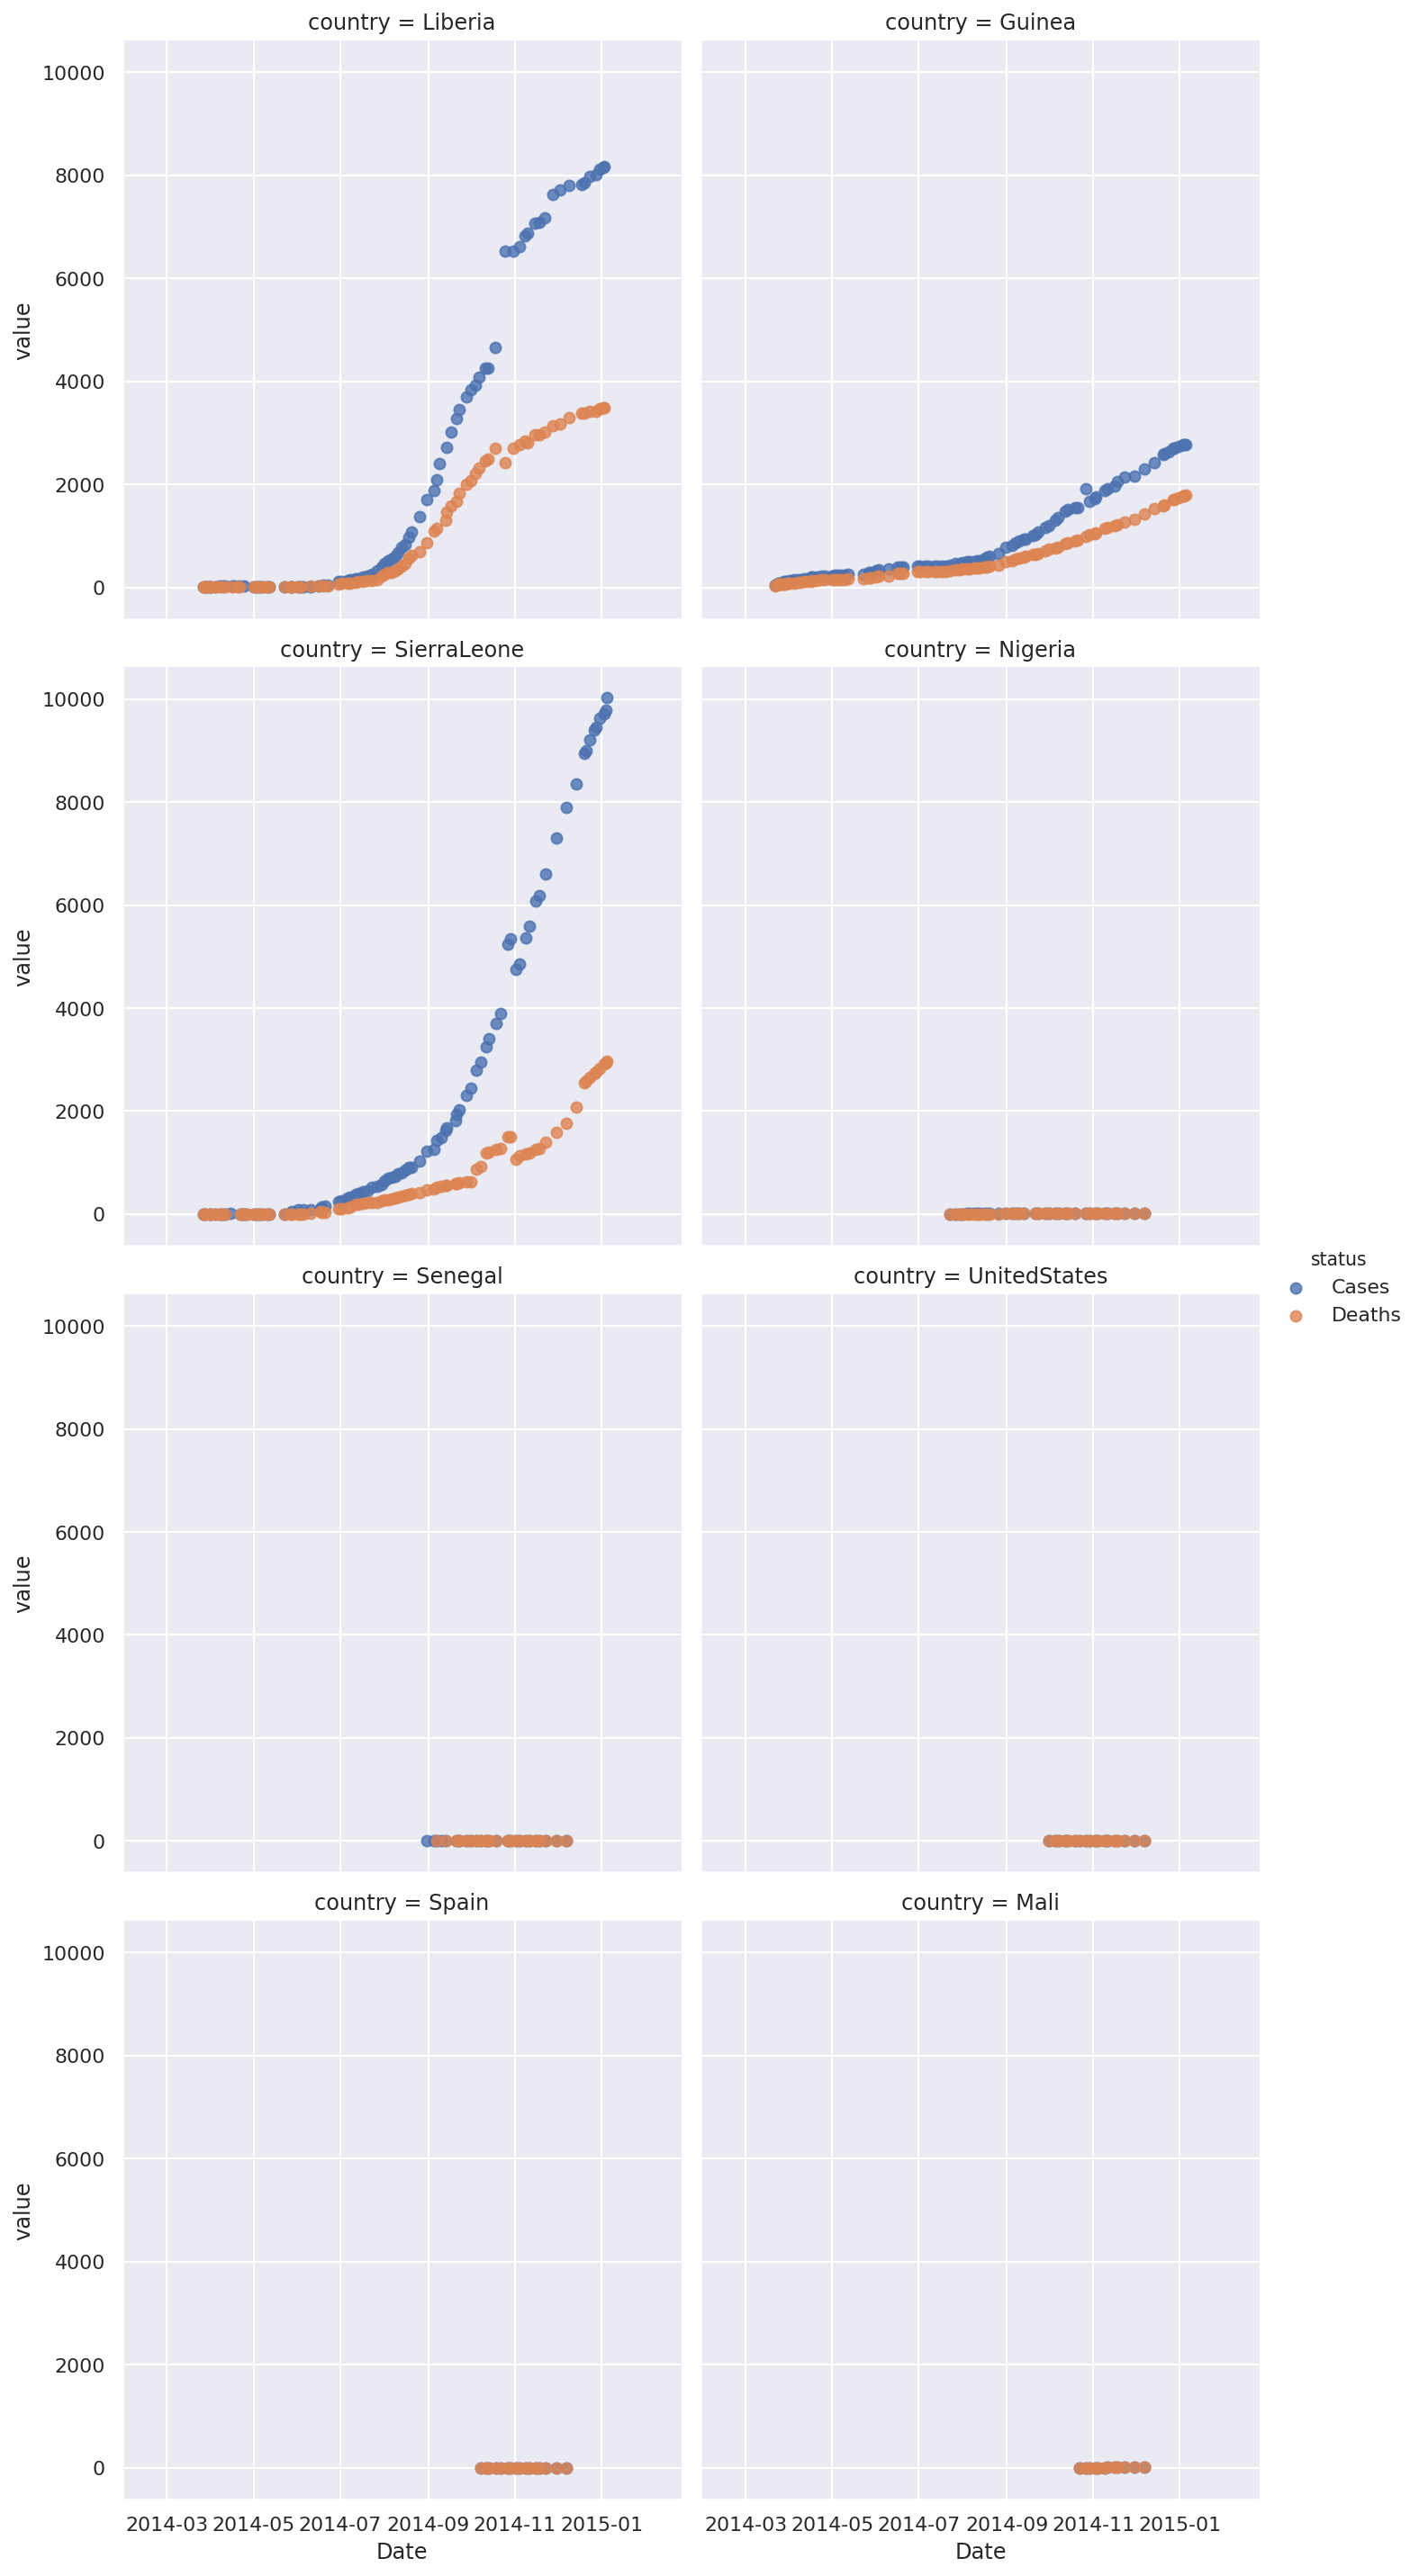

In [314]:
scatter = sns.lmplot(x='Date', y='value', data=table, fit_reg=False,hue='status' ,col='country', col_wrap=2)  
plt.show()

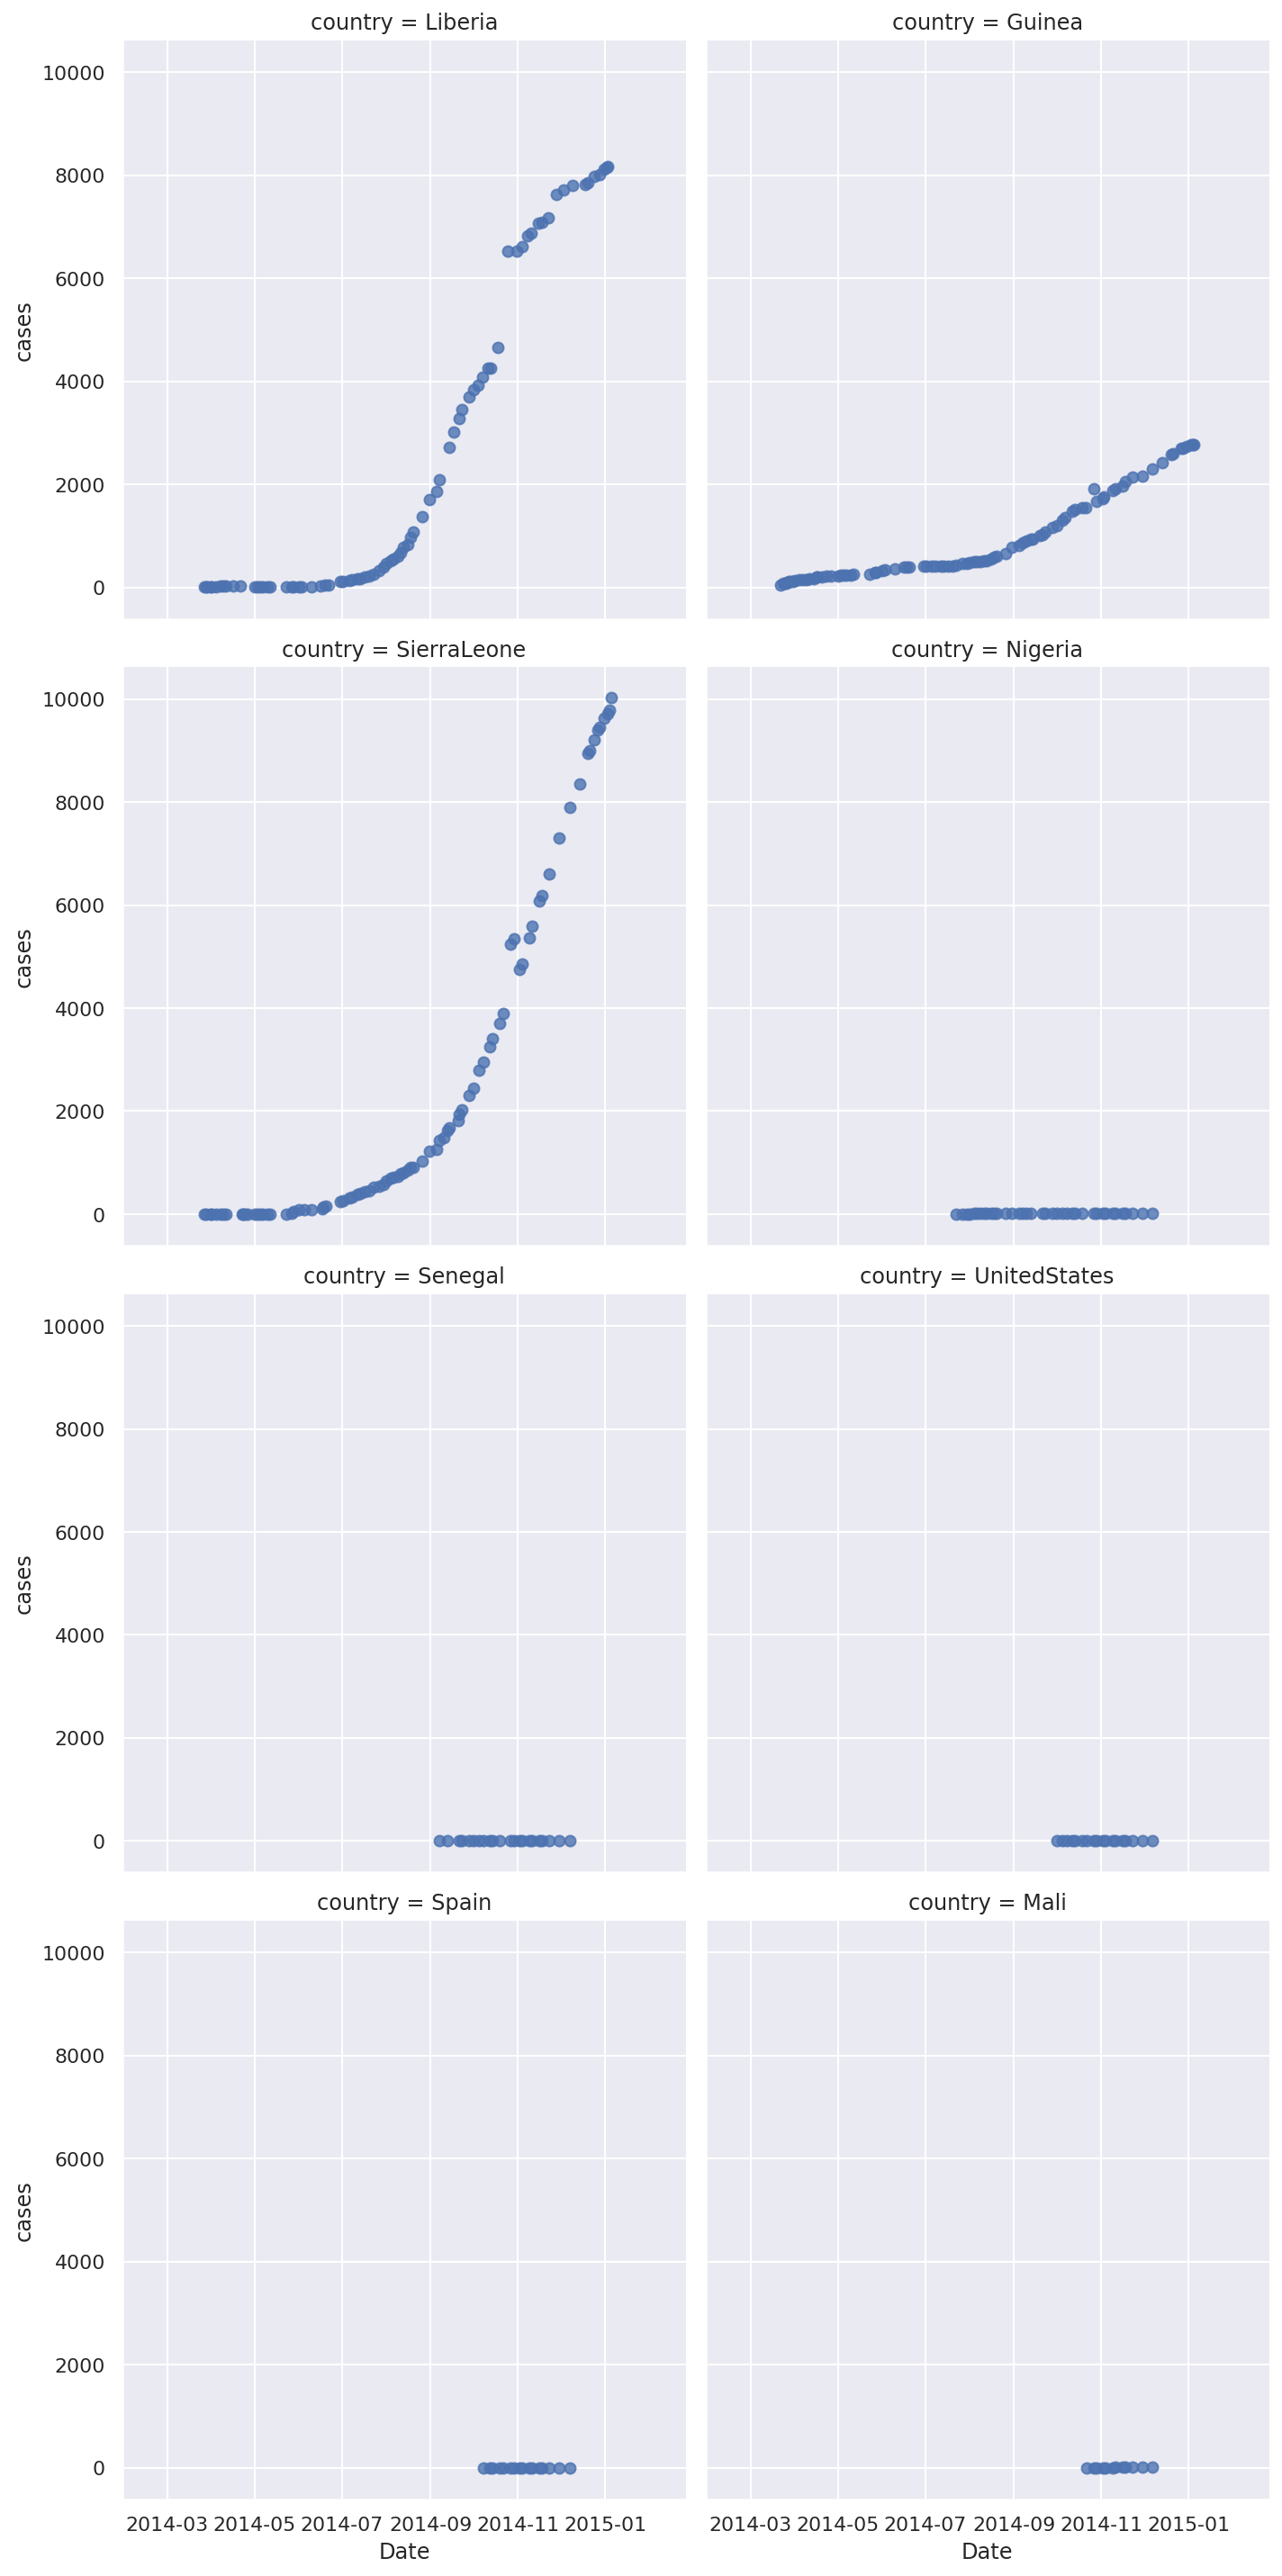

In [306]:
scatter = sns.lmplot(x='Date', y='cases', data=ebola_merged, fit_reg=False, col='country', col_wrap=2)  
plt.show()

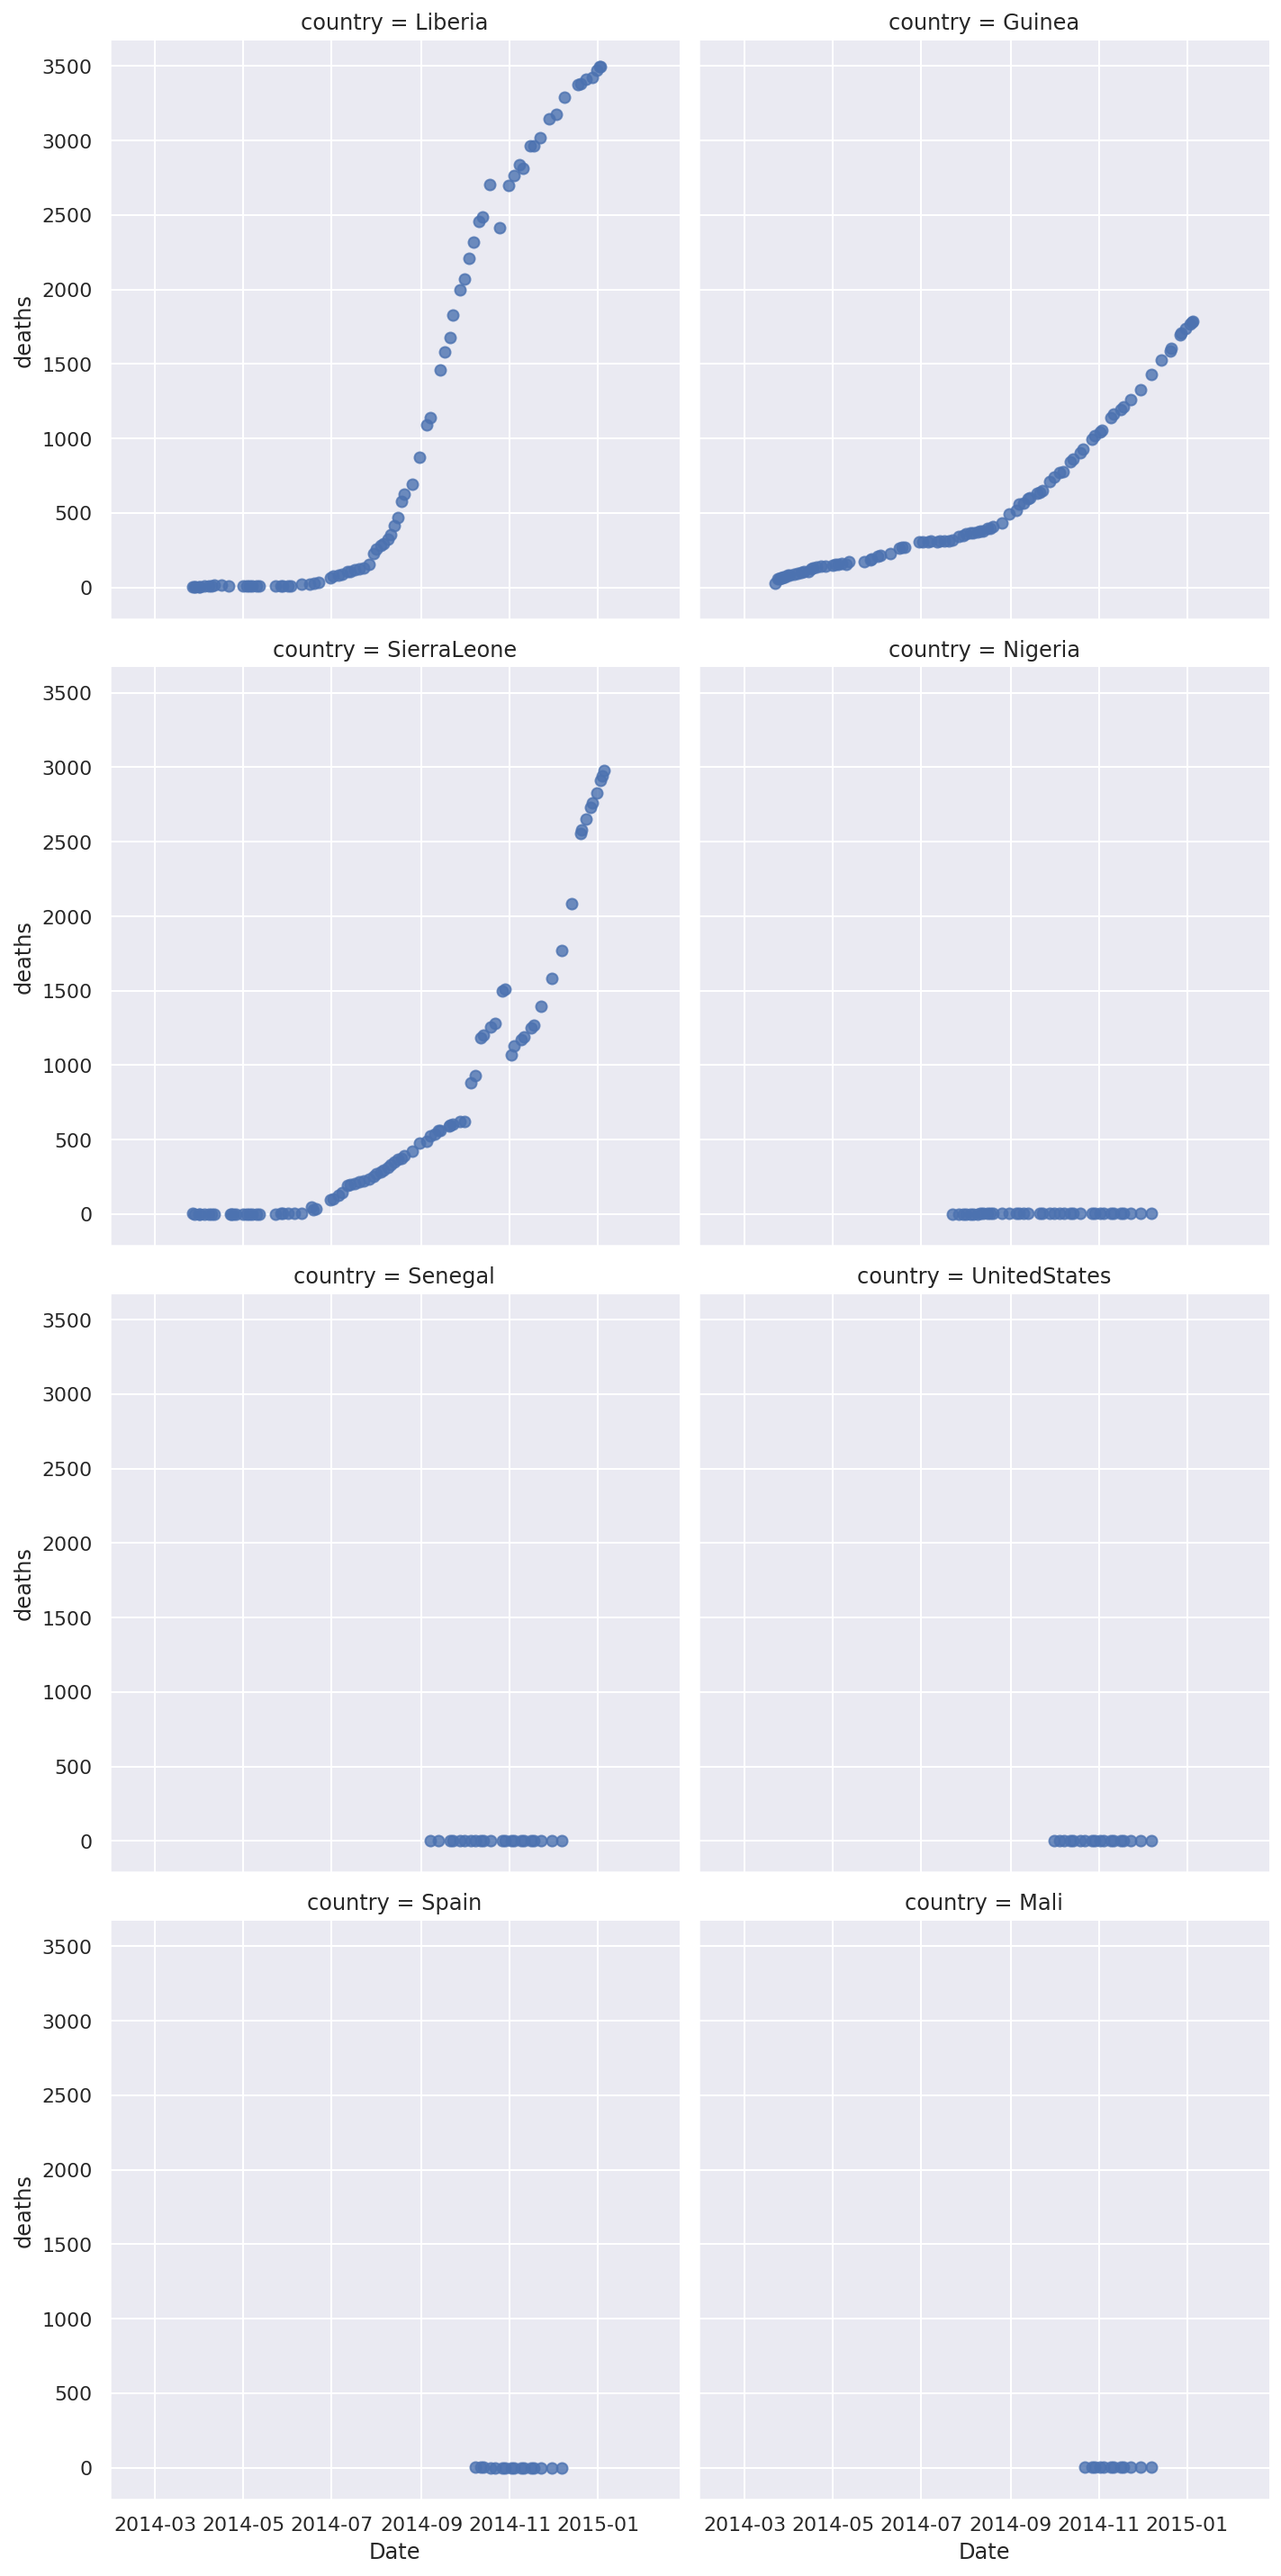

In [298]:
scatter = sns.lmplot(x='Date', y='deaths', data=ebola_merged, fit_reg=False, col='country', col_wrap=2) 
plt.show()

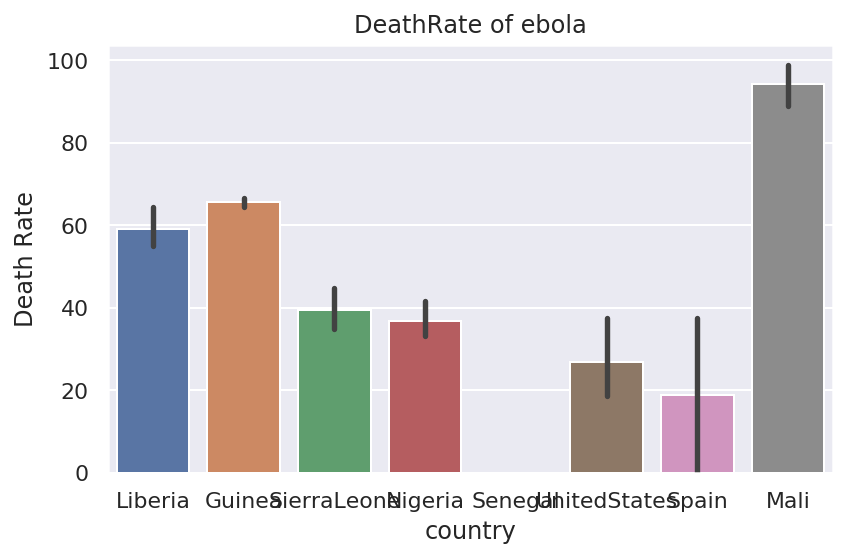

In [302]:
ax = plt.subplots() 
ax = sns.barplot(x='country', y='deathRate', data=ebola_merged) 
ax.set_title('DeathRate of ebola') 
ax.set_xlabel('country') 
ax.set_ylabel('Death Rate')
plt.tight_layout()
plt.show()

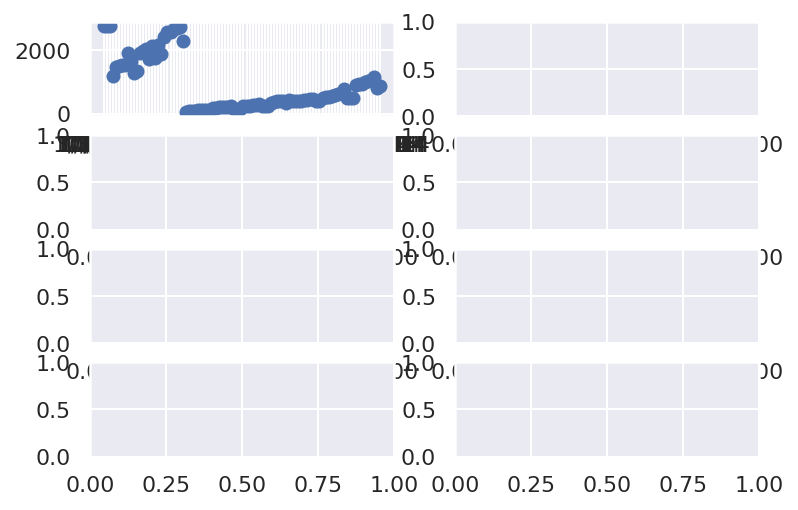

In [293]:
fig = plt.figure()
axes1 = fig.add_subplot(4, 2, 1)
axes2 = fig.add_subplot(4, 2, 2)
axes3 = fig.add_subplot(4, 2, 3)
axes4 = fig.add_subplot(4, 2, 4)
axes5 = fig.add_subplot(4, 2, 5)
axes6 = fig.add_subplot(4, 2, 6)
axes7 = fig.add_subplot(4, 2, 7)
axes8 = fig.add_subplot(4, 2, 8)
axes1.plot(ebola_merged[ebola_merged.country==ctry_ls[0]]['Date'], ebola_merged[ebola_merged.country==ctry_ls[0]]['cases'], 'o') 
axes1.plot(ebola_merged[ebola_merged.country==ctry_ls[0]]['Date'], ebola_merged[ebola_merged.country==ctry_ls[0]]['cases'], 'o') 

# 알아두면 좋아요!
## 반복문으로 데이터 준비하기(169쪽)

In [39]:
list_taxi_df = [] 

for csv_filename in nyc_taxi_data:
    # print(csv_filename)
    df = pd.read_csv(csv_filename)
    list_taxi_df.append(df) 

print(len(list_taxi_df))

5


In [40]:
print(type(list_taxi_df[0]))

<class 'pandas.core.frame.DataFrame'>


In [41]:
print(list_taxi_df[0].head())

  Dispatching_base_num          Pickup_date  locationID
0               B00013  2015-01-01 00:30:00         NaN
1               B00013  2015-01-01 01:22:00         NaN
2               B00013  2015-01-01 01:23:00         NaN
3               B00013  2015-01-01 01:44:00         NaN
4               B00013  2015-01-01 02:00:00         NaN


In [42]:
taxi_loop_concat = pd.concat(list_taxi_df) 
print(taxi_loop_concat.shape)

(17367717, 3)


In [43]:
print(taxi.equals(taxi_loop_concat))

True
